## Tugas 

- Nama    : Muh. Fauzi Ramadhan Nugraha
- NIM     : 2041720022
- Kelas   : TI-3B

Lakukanlah proses classification learning Decision Tree dengan ketentuan,

1. Menggunakan data `mushrooms.csv`
2. Evaluasi hasilnya

### Data Preprocessing

In [17]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
mushroom = pd.read_csv('dataset/mushrooms.csv')

# Inspeksi data
display(mushroom.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
# Cek Deskripsi Data
display(mushroom.describe())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [19]:
# Cek Informasi Data
print(mushroom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [20]:
# Cek apakah ada data yang null

print(mushroom.isna().sum());

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [21]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in mushroom.columns:
    mushroom[col]=labelencoder.fit_transform(mushroom[col])
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [22]:
# Pembagian Independent dan dependent variable
xm = mushroom.iloc[:,1:23].values
ym = mushroom.iloc[:,0].values 

# Reshape Ym to 2D
ym = ym.reshape(len(ym),1)

In [23]:
from sklearn.model_selection import train_test_split

Xm_train, Xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=45)

### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeClassifier

#Fit Model Gini
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(Xm_train,ym_train)
y_pred_gini = dt_gini.predict(Xm_test)

#Fit Model Entropy
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(Xm_train,ym_train)
y_pred_entropy = dt_gini.predict(Xm_test)

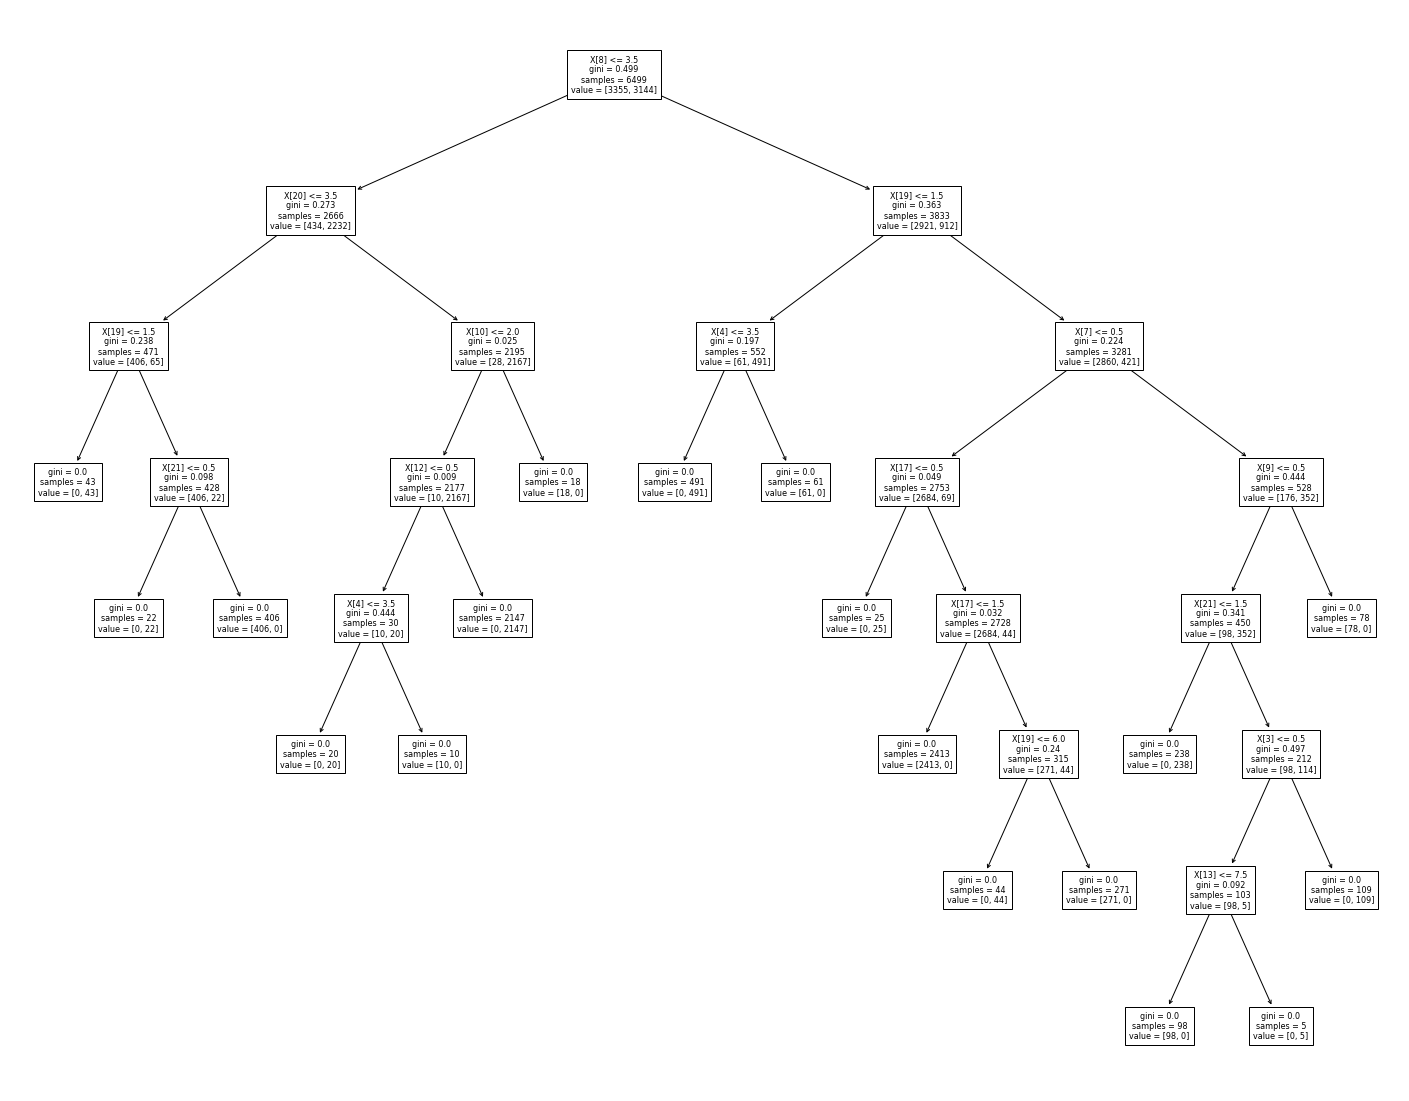

In [25]:
# Visualisasi Decision Tree From Data Train
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(dt_gini.fit(Xm_train,ym_train), fontsize=8)
plt.show()

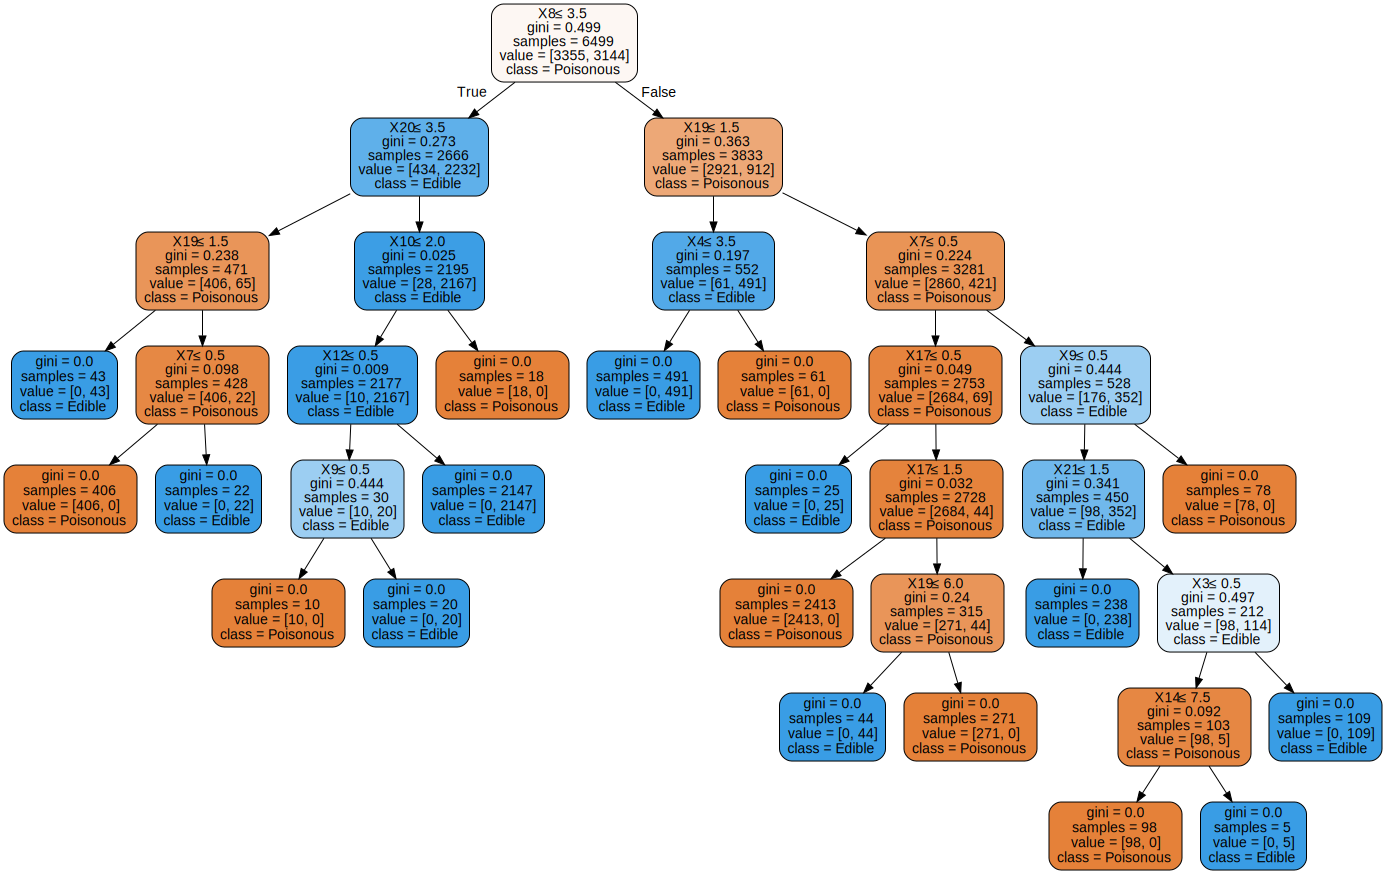

In [26]:
# Visualisasi dengan Graphviz
import graphviz

dot_data = tree.export_graphviz(
    dt_gini.fit(Xm_train,ym_train), 
    out_file=None,
    class_names=['Poisonous', 'Edible'],
    filled=True, rounded=True, 
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [27]:
# Prediksi Label Set
ym_pred = dt_gini.predict(Xm_test)
print(ym_pred[0:5])

[0 0 1 1 0]


In [28]:
def inverse_label(e):
    return 'p' if e == 1 else 'e'

res_label = np.vectorize(inverse_label)
pred_label = res_label(ym_pred[0:5])
print(pred_label)

['e' 'e' 'p' 'p' 'e']


### Evaluasi Classification Tree

In [29]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

# Memprediksi test set labels
ym_pred_gini = dt_gini.predict(Xm_test)
ym_pred_entropy = dt_entropy.predict(Xm_test)
#  menghitung set accuracy
acc_gini = accuracy_score(ym_test, ym_pred_gini)
acc_entropy = accuracy_score(ym_test, ym_pred_entropy)

print("Accuracy Test (Gini): {}".format(acc_gini))
print("Accuracy Test (Entropy) : {}".format(acc_entropy))

Accuracy Test (Gini): 1.0
Accuracy Test (Entropy) : 1.0
